In this demo, we'll look at performing multivariate least-squares regression using `bayesregress.fit_data`. We'll find a good fit to a complicated function with no user supplied information about what the function should be like, and without fine-tuning any parameters to get a good fit.

First we import:

In [1]:
import numpy as np
from bayesregress import fit_data
import matplotlib.pyplot as plt

We set a seed so that this demo is reproducible:

In [3]:
rng = np.random.default_rng(seed=1676)

Next, we generate some data.

In [4]:
x1, x2, x3 = rng.standard_normal((3, 1300))
model = (
    100 +
    3 * x1 +
    2 * x2**2 + 0.3 * x2 +
    np.sin(x3))
noise = rng.standard_normal(x1.shape)
y = model + noise

We can provide named variables as well, to make things easier to keep track of.

In [5]:
x = {'x1': x1, 'x2': x2, 'x3': x3}

Fitting the data is the same as for the univariate case:

In [6]:
result = fit_data(x, y)
result

/home/brian/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/brian/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/home/brian/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1058: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


<GaussianRegressionResult for 1 variable vs ['x1', 'x2', 'x3'] at 0x7f7654e01860>

So is getting the model predictions:

In [7]:
prediction = result.predict_for_map_model(x)

The model and the fit agree well, despite the model's complicated, nonlinear functional form.

Text(0.5, 1.0, 'Model-vs-Prediction: R^2 = 0.996')

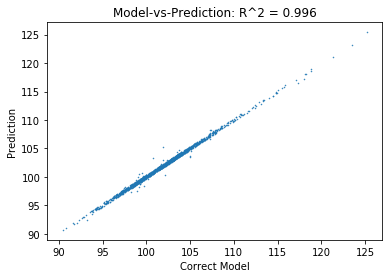

In [9]:
rsquared = np.corrcoef(model, prediction)[0, 1]**2

plt.plot(model, prediction, '.', ms=1)
plt.xlabel("Correct Model")
plt.ylabel("Prediction")
plt.title("Model-vs-Prediction: R^2 = {:0.3f}".format(rsquared))